## Классификация изображений

В данной задаче решается задача классификации изображений – отделение изображений кошек от изображений собак, используя классификацию с мягким зазором и параметром C=1,35.  

В предложенном архиве train находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.
Следующая выборка test предназначена для классификации новых объектов после построения классификатора.

Cкачивание архивов, распаковка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Установка модулей, подключение библиотек

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

Для работы с изображениями находятся их гистограммы — характеристики распределения интенсивности изображения.

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Считывание изображений из корневой папки train и вичисление гистограммы каждого изображения. Отделение метки.

In [ ]:
imagePaths = sorted(list(paths.list_images('drive/MyDrive/train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Преобразование метки в удобный формат 0 и 1. Тестирование на самой первой попавшейся картинке.

0


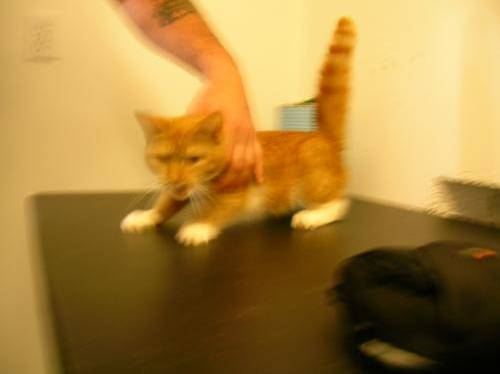

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Разделение выборки на тренировочную и тестовую в отношении 75/25 с параметром random_state = 51.

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=15)

Обучение модели почти-разделяющий гиперплосоксти на данных, ее оценка на тестовых данных.

In [ ]:
model = LinearSVC(random_state = 15, C = 1.35)
model.fit(trainData, trainLabels)

LinearSVC(C=1.35, random_state=15)

In [ ]:
predictions = model.predict(testData)

Ниже вывод матрицы ошибок для каждого класса: рассчитывается точность (precision) и полнота (recall). Затем вычисляется значение метрики F1 для каждого класса: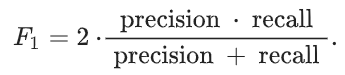


In [ ]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.62      0.67      0.64        12
         dog       0.67      0.62      0.64        13

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



In [ ]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro') # среднее значение F1

0.64

Коэффициент  θ1  построенной гиперплоскости:

In [ ]:
model.coef_[0][55] #  ввести также индексы коэффициентов, которые надо найти (они могут быть равны нулю)

8.470329472543003e-22

##Предсказания для объекта из папки test

Вводится название фото, для которого нужно определить класс.

In [ ]:
singleImage = cv2.imread('drive/MyDrive/test/cat.1034.jpg') 
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

Если класс ['cat'] - ответ 0, если ['dog'] - 1

In [ ]:
prediction

array([0])

Вывод тестового изображения

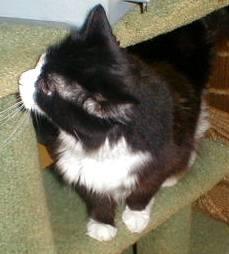

In [ ]:
Image(filename="drive/MyDrive/test/cat.1034.jpg")